  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

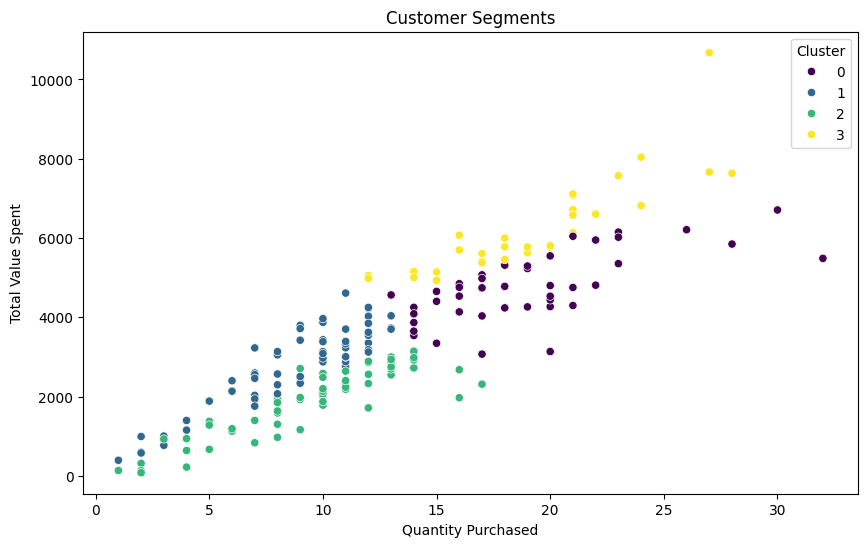

Number of customers in each cluster:
Cluster
1    67
2    59
0    43
3    30
Name: count, dtype: int64
  CustomerID  Quantity  TotalValue       Price  Cluster
0      C0001        12     3354.52  278.334000        1
1      C0002        10     1862.74  208.920000        2
2      C0003        14     2725.38  195.707500        2
3      C0004        23     5354.88  240.636250        0
4      C0005         7     2034.24  291.603333        1


In [11]:
# Import necessary libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the datasets
customers = pd.read_csv("../data/Customers.csv")
products = pd.read_csv("../data/Products.csv")
transactions = pd.read_csv("../data/Transactions.csv")

# Check the first few rows of each dataset to ensure they are loaded correctly
print(customers.head())
print(products.head())
print(transactions.head())

# Data Preprocessing for Clustering
# Merge customer data with transaction data
customer_transactions = pd.merge(transactions, customers, on='CustomerID')

# Aggregating the transaction data by CustomerID
# We will use features like total quantity purchased, total value spent, and average product price
customer_transactions_grouped = customer_transactions.groupby('CustomerID').agg({
    'Quantity': 'sum',
    'TotalValue': 'sum',
    'Price': 'mean'
}).reset_index()

# Check the aggregated data
print(customer_transactions_grouped.head())

# Standardize the features before clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_transactions_grouped[['Quantity', 'TotalValue', 'Price']])

# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)  # Adjust the number of clusters as needed (between 2-10)
customer_transactions_grouped['Cluster'] = kmeans.fit_predict(scaled_data)

# Calculate the Davies-Bouldin Index to evaluate clustering
db_index = davies_bouldin_score(scaled_data, customer_transactions_grouped['Cluster'])
print(f"DB Index: {db_index}")

# Visualize the clusters using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Quantity', y='TotalValue', hue='Cluster', data=customer_transactions_grouped, palette='viridis')
plt.title('Customer Segments')
plt.xlabel('Quantity Purchased')
plt.ylabel('Total Value Spent')
plt.legend(title='Cluster')
plt.show()

# Additional Cluster Analysis: Display the number of customers in each cluster
cluster_counts = customer_transactions_grouped['Cluster'].value_counts()
print("Number of customers in each cluster:")
print(cluster_counts)

# Save the clustering results to a CSV
customer_transactions_grouped.to_csv('../outputs/Brijesh_Vadaliya_Clustering.csv', index=False)

# Print the first few rows of the clustering result
print(customer_transactions_grouped.head())
